Table of Contents

1. [Importing Libraries](#Importing-the-Data)
2. [Loading the Data](#Loading-the-Data)
3. [Creating the Model](#creating-the-logistic-regression-model)
4. [Showing Metrics](#Showing-the-metrics)
5. [Summary](#summary)

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from sklearn.metrics import ConfusionMatrixDisplay


## Loading the Data 

### Loading the Pickle files

In [2]:
# Load pickled data from a file
with open('x_train.pickle', 'rb') as file:
    x_train = pickle.load(file)

with open('x_test.pickle', 'rb') as file:
    x_test = pickle.load(file)

with open('y_train.pickle', 'rb') as file:
    y_train = pickle.load(file)

with open('y_test.pickle', 'rb') as file:
    y_test = pickle.load(file)

#### Just taking a look at part of the loaded data.

In [3]:
x_train.head(1)

,h1n1_concern_Not at all concerned,h1n1_concern_Not very concerned,h1n1_concern_Somewhat concerned,h1n1_concern_Unknown,h1n1_concern_Very concerned,h1n1_knowledge_A little knowledge,h1n1_knowledge_A lot of knowledge,h1n1_knowledge_No knowledge,h1n1_knowledge_Unknown,behavioral_antiviral_meds_Not on antiviral medications,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
19557,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
x_test.head(1)

,h1n1_concern_Not at all concerned,h1n1_concern_Not very concerned,h1n1_concern_Somewhat concerned,h1n1_concern_Unknown,h1n1_concern_Very concerned,h1n1_knowledge_A little knowledge,h1n1_knowledge_A lot of knowledge,h1n1_knowledge_No knowledge,h1n1_knowledge_Unknown,behavioral_antiviral_meds_Not on antiviral medications,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
2543,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train.head(1)

19557    No Vaccines
Name: vaccine_status, dtype: object

In [6]:
y_train.head(1)

19557    No Vaccines
Name: vaccine_status, dtype: object

### Creating the Logistic Regression Model

In [7]:
logmodel = LogisticRegression()


In [8]:
logmodel.fit(x_train, y_train)


c:\Users\Duane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
predictions = logmodel.predict(x_test)

In [10]:
print(classification_report(y_test, predictions))

                       precision    recall  f1-score   support

        Both Vaccines       0.64      0.59      0.61       940
    H1N1 Vaccine Only       0.51      0.10      0.17       195
          No Vaccines       0.74      0.84      0.78      2659
Seasonal Vaccine Only       0.63      0.57      0.60      1548

             accuracy                           0.69      5342
            macro avg       0.63      0.53      0.54      5342
         weighted avg       0.68      0.69      0.68      5342



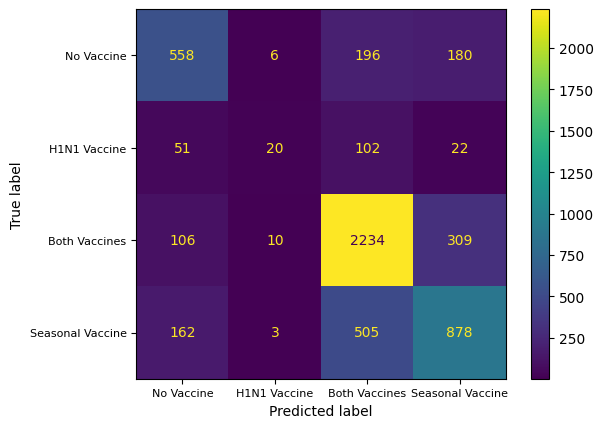

In [11]:


# Assuming you have already calculated the confusion matrix
cm = confusion_matrix(y_test, predictions)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['No Vaccine', 'H1N1 Vaccine','Both Vaccines', 'Seasonal Vaccine'],)
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3])
ax.set_xticklabels(labels = ['None', 'H1N1','Both','Seas'], fontsize = 8)
ax.set_yticklabels(labels = ['None', 'H1N1','Both','Seas'], fontsize = 8)
display_cm.plot(ax = ax)

In [12]:
confusion_matrix(y_test, predictions)

array([[ 558,    6,  196,  180],
       [  51,   20,  102,   22],
       [ 106,   10, 2234,  309],
       [ 162,    3,  505,  878]], dtype=int64)

## Summary

In this notebook I loaded the pickled data from the last notebook created a logistic regression model  I then ran it on the data, ran the a classification report and a confusion matrix to show the findings. The model over all isnt very accurate. It accuracy is 69%. The model does a decent job at finding which respondents do not get any vaccince at around 78%. The model was almost identical at perdicting when a respondent was going to get either both vaccines, 61% or just the seasonal vaccince at 60%.